# Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

**1.Connecting to dataset** 

In [16]:
df=pd.read_csv("D:/nalaya thiran/datafile_02.csv")

**printing all column names and head( first 5 records)**

In [17]:
print(df.columns)
df.head()

Index(['Port', 'Traffic in Eleventh Plan (MT) (2011-12)Proj.',
       'Traffic in Eleventh Plan (MT) (2011-12) Ach.',
       'Traffic in Eleventh Plan (MT) (2011-12) %',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) Proj.',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) Ach.',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) %'],
      dtype='object')


,Port,Traffic in Eleventh Plan (MT) (2011-12)Proj.,Traffic in Eleventh Plan (MT) (2011-12) Ach.,Traffic in Eleventh Plan (MT) (2011-12) %,Total Capacity in Eleventh Plan (MT) (2011-12) Proj.,Total Capacity in Eleventh Plan (MT) (2011-12) Ach.,Total Capacity in Eleventh Plan (MT) (2011-12) %
0,Kolkata,1343,1223,9100,3145,1635,5100
1,Haldia,4450,3101,7000,6340,5070,7900
2,Paradeep,7640,5425,7100,10640,7650,7100
3,Visakhapatnam,8220,6742,8200,10810,7293,6700
4,Ennore,4700,1496,3200,6420,3100,4800


# Preprocessing the Dataset

**Renamining the column**

In [18]:
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12)Proj.':'Traffic_Projected','Traffic in Eleventh Plan (MT) (2011-12)Ach.':'Traffic_Achieved', 'Total Capacity in Eleventh Plan (MT)(2011-12) Proj.':'Total_Capacity_Projected', 'Total Capacity in Eleventh Plan (MT) (2011-12) Ach.':'Total_Capacity_Achieved'}, inplace= True)
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12) Ach.': 'Traffic_Achieved'},inplace = True)
df.rename(columns = {'Total Capacity  in Eleventh Plan (MT) (2011-12) Ach.': 'Total_Capacity_Achieved'},inplace = True)
df.rename(columns = {'Total Capacity  in Eleventh Plan (MT) (2011-12) Proj.':'Total_Capacity_Projected'},inplace = True)


# Preparing Calculation

In [19]:
Traffic_Percent =round((df.Traffic_Achieved/df.Traffic_Projected)*100,2)
Traffic_Percent

0     91.06
1     69.69
2     71.01
3     82.02
4     31.83
5     96.89
6     88.59
7     52.66
8     67.49
9     87.54
10    79.07
11    99.56
12    95.13
dtype: float64

In [20]:
Total_Percent =round( (df.Total_Capacity_Achieved/df.Total_Capacity_Projected)*100,2)
Total_Percent

0      51.99
1      79.97
2      71.90
3      67.47
4      48.29
5     110.26
6      52.11
7      74.85
8      84.25
9      62.63
10     48.45
11     66.95
12     71.12
dtype: float64

**Replacing the existing columns with newly created columns**

In [21]:
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12) %':'Traffic_Percent%','Total Capacity  in Eleventh Plan (MT) (2011-12) %':'Total_Percent%'}, inplace = True)
df.iloc[:,3:4] = Traffic_Percent
df.iloc[:,6:] = Total_Percent
df

,Port,Traffic_Projected,Traffic_Achieved,Traffic_Percent%,Total_Capacity_Projected,Total_Capacity_Achieved,Total_Percent%
0,Kolkata,1343,1223,91.06,3145,1635,51.99
1,Haldia,4450,3101,69.69,6340,5070,79.97
2,Paradeep,7640,5425,71.01,10640,7650,71.90
3,Visakhapatnam,8220,6742,82.02,10810,7293,67.47
4,Ennore,4700,1496,31.83,6420,3100,48.29
5,Chennai,5750,5571,96.89,7230,7972,110.26
6,Tuticorin,3172,2810,88.59,6398,3334,52.11
7,Cochin,3817,2010,52.66,5475,4098,74.85
8,NMPT,4881,3294,67.49,6050,5097,84.25
9,Mormugao,4455,3900,87.54,6690,4190,62.63


**Checking for null values**

In [22]:
df.isnull().sum()

Port                        0
Traffic_Projected           0
Traffic_Achieved            0
Traffic_Percent%            0
Total_Capacity_Projected    0
Total_Capacity_Achieved     0
Total_Percent%              0
dtype: int64

**Finding Outliers anr replacing the outliers**

<AxesSubplot:xlabel='Port', ylabel='Traffic_Projected'>

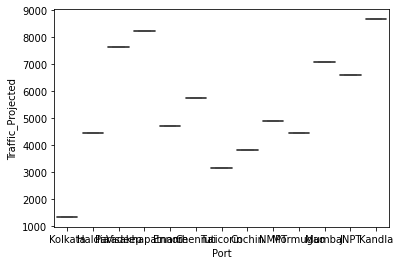

In [23]:
sns.boxplot(x='Port',y='Traffic_Projected',data=df)

**Check For Categorical Columns and do encoding**

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(df.Port.value_counts())

df.Port = le.fit_transform(df.Port)
print(df.Port.value_counts())

Visakhapatnam    1
Cochin           1
Ennore           1
Haldia           1
Kolkata          1
Mormugao         1
Tuticorin        1
Mumbai           1
Paradeep         1
NMPT             1
JNPT             1
Kandla           1
Chennai          1
Name: Port, dtype: int64
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: Port, dtype: int64
